## Part-I Algorithms Explained

### 1. Gradient Descent (GD/Batch GD)
Gradient Descent is an optimization algorithm that updates model parameters by computing the gradient of the loss function with respect to all training data. In Batch GD, the entire dataset is used to calculate the gradient at each step, leading to stable but potentially slow convergence.

### 2. Minibatch SGD
Minibatch Stochastic Gradient Descent splits the dataset into small batches. The model parameters are updated after each batch, balancing the stability of Batch GD and the speed of Stochastic GD. This approach is widely used in deep learning due to its efficiency and ability to leverage parallel hardware.

### 3. Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent updates model parameters for each training example individually. This introduces more noise in the updates, which can help escape local minima but may also cause the optimization path to fluctuate.


In [14]:


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [15]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train), to_categorical(y_test)


Dataset Information:
Training data shape: (60000, 28, 28) (60,000 images)
Test data shape: (10000, 28, 28) (10,000 images)
Pixel range: 0.0-1.0
Number of classes: 10


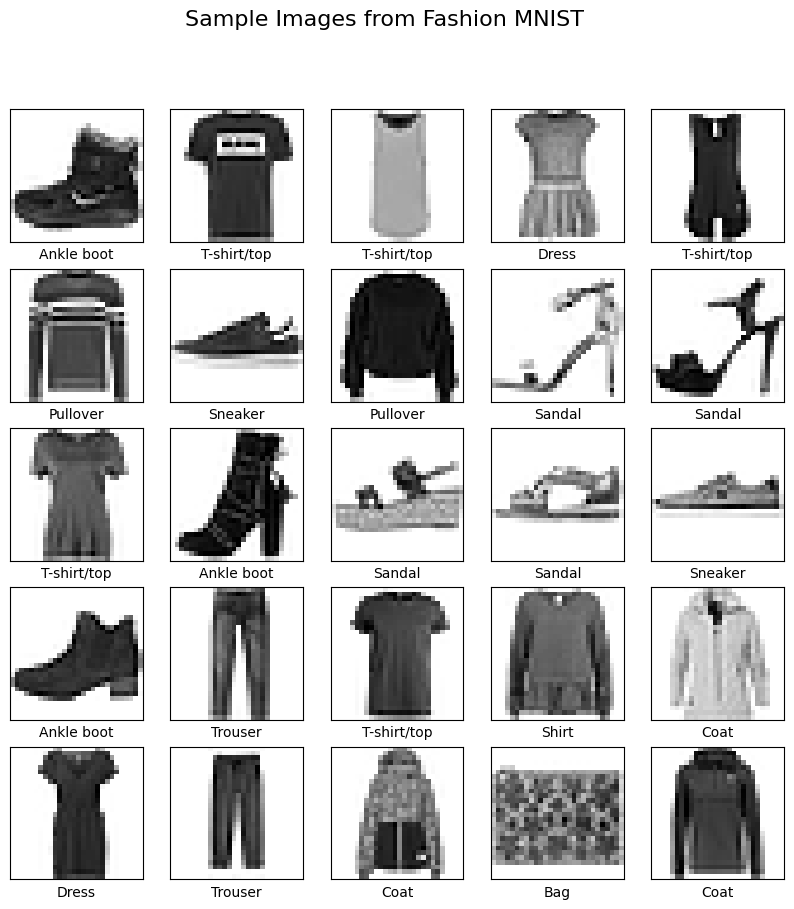

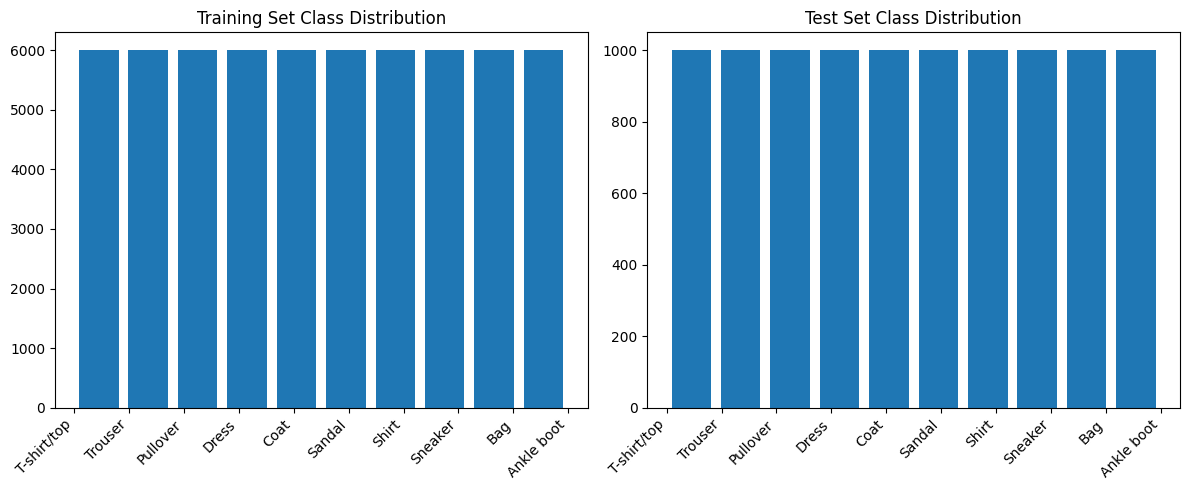

In [16]:
# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display basic dataset information
print("Dataset Information:")
print(f"Training data shape: {x_train.shape} (60,000 images)")
print(f"Test data shape: {x_test.shape} (10,000 images)")
print(f"Pixel range: {np.min(x_train)}-{np.max(x_train)}")
print(f"Number of classes: {len(class_names)}")

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.suptitle("Sample Images from Fashion MNIST", fontsize=16)
plt.show()


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(y_train, bins=10, rwidth=0.8)
plt.title("Training Set Class Distribution")
plt.xticks(range(10), class_names, rotation=45, ha='right')

plt.subplot(1,2,2)
plt.hist(y_test, bins=10, rwidth=0.8)
plt.title("Test Set Class Distribution")
plt.xticks(range(10), class_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [17]:

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [18]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [19]:
# Part-I Optimizers (as callables to avoid reusing instances)
optimizers = {
    "Batch GD": lambda: tf.keras.optimizers.SGD(),
    "MiniBatch SGD": lambda: tf.keras.optimizers.SGD(),
    "Stochastic GD": lambda: tf.keras.optimizers.SGD(),
}

In [20]:

# Dictionary to store results
results = {}

# Model definition function
def create_model():
    model = Sequential([
        Input(shape=(28, 28)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    # Sequential([
    #     Flatten(input_shape=(28, 28)),
    #     Dense(128, activation='relu'),
    #     Dropout(0.2),
    #     Dense(10, activation='softmax')
    # ])
    return model

In [21]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
import numpy as np
from sklearn.metrics import f1_score
tf.config.run_functions_eagerly(False)


for name, get_optimizer in optimizers.items():
    print(f"Training with {name} optimizer...")
    model = create_model()
    model.compile(optimizer=get_optimizer(), loss='categorical_crossentropy', metrics=['accuracy'])
    if name == "Batch GD":
        batch_size = len(x_train)  # entire training set
    elif name == "MiniBatch SGD":
        batch_size = 64
    else:  # Stochastic GD
        batch_size = 1

    history = model.fit(x_train, y_train_cat, epochs=10, batch_size=batch_size, verbose=0, validation_split=0.1)

    # Evaluate
    loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
    y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        "accuracy": acc,
        "f1_score": f1,
        "history": history.history
    }

Training with Batch GD optimizer...
Training with MiniBatch SGD optimizer...
Training with Stochastic GD optimizer...


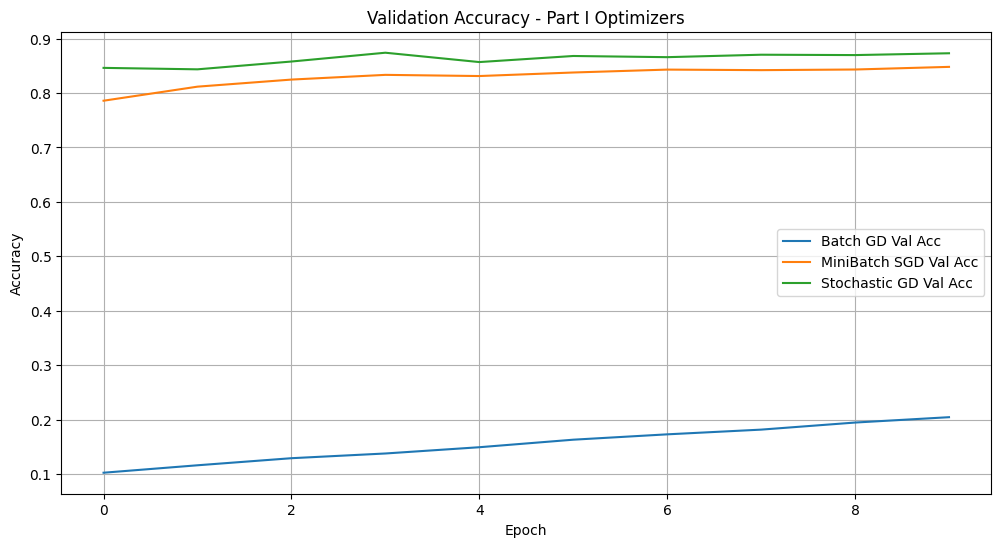

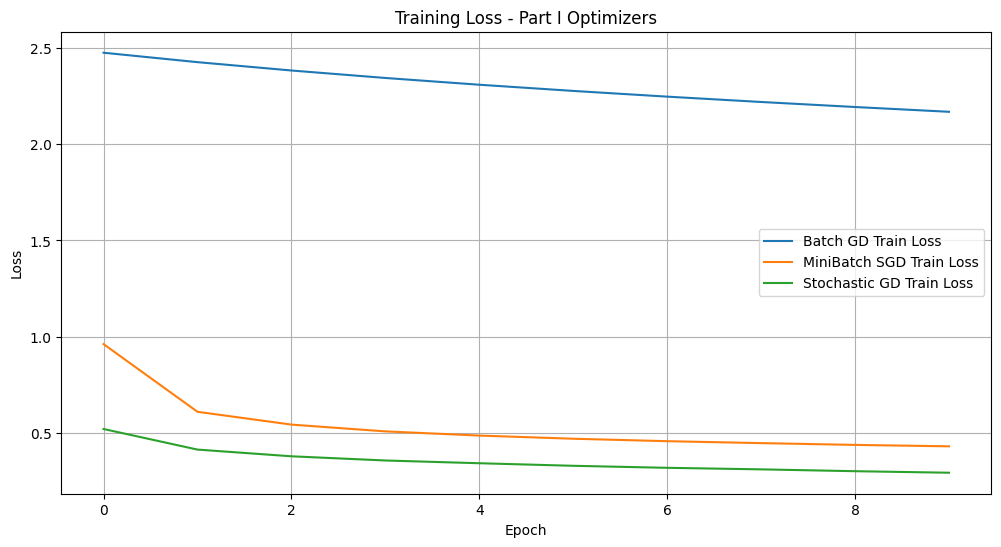

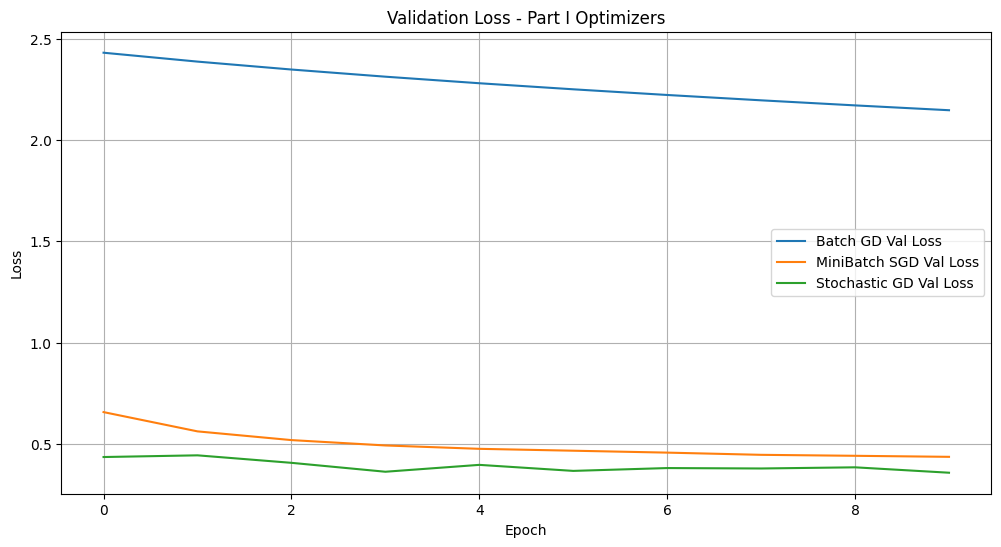


Final Results - Part I:
Batch GD        - Accuracy: 0.2043, F1 Score: 0.1676
MiniBatch SGD   - Accuracy: 0.8366, F1 Score: 0.8362
Stochastic GD   - Accuracy: 0.8664, F1 Score: 0.8661


In [22]:
plt.figure(figsize=(12, 6))
for name, res in results.items():
    plt.plot(res['history']['val_accuracy'], label=f"{name} Val Acc")
plt.title("Validation Accuracy - Part I Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Visualization - Training Loss
plt.figure(figsize=(12, 6))
for name, res in results.items():
    plt.plot(res['history']['loss'], label=f"{name} Train Loss")
plt.title("Training Loss - Part I Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Visualization - Validation Loss
plt.figure(figsize=(12, 6))
for name, res in results.items():
    plt.plot(res['history']['val_loss'], label=f"{name} Val Loss")
plt.title("Validation Loss - Part I Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Final performance table
print("\nFinal Results - Part I:")
for name, res in results.items():
    print(f"{name:15} - Accuracy: {res['accuracy']:.4f}, F1 Score: {res['f1_score']:.4f}")


## 🔍 Part I Analysis: Gradient Descent Optimizers

### 🧪 Objective
To evaluate the impact of different gradient descent variants — **Batch Gradient Descent**, **Mini-Batch Stochastic Gradient Descent**, and **Stochastic Gradient Descent (SGD)** — on the performance of a neural network trained on the Fashion MNIST dataset.

---

### ⚙️ Setup Summary
- **Model:** Simple feedforward neural network with one hidden layer and dropout.
- **Dataset:** Fashion MNIST, normalized to [0, 1], with categorical labels.
- **Metrics:** Validation Accuracy, Training Loss, Validation Loss, and Weighted F1 Score.
- **Evaluation Method:** 10 epochs, `validation_split=0.1`.

---

### 📊 Results Summary

| Optimizer         | Accuracy | F1 Score |
|-------------------|----------|----------|
| **Batch GD**      | 0.2043   | 0.1676   |
| **MiniBatch SGD** | 0.8366   | 0.8362   |
| **Stochastic GD** | 0.8664   | 0.8661   |

---

### 🧠 Analysis

#### ✅ Stochastic Gradient Descent (SGD)
- **Performance:** Achieved the **highest accuracy and F1 score**.
- **Why it works:** Frequent updates (every sample) introduce beneficial noise that helps escape local minima and leads to better generalization.
- **Trade-off:** Noisier convergence and more variability in the loss curve.

#### ✅ Mini-Batch SGD
- **Performance:** Close to SGD with slightly lower metrics.
- **Why it works:** Combines the stability of batch updates with the regular updates of SGD. A good trade-off between speed and performance.
- **Use case:** Ideal for real-world training due to hardware efficiency and stable gradients.

#### ❌ Batch Gradient Descent
- **Performance:** Significantly underperformed.
- **Why it fails:** Uses the full dataset for every update, resulting in **slower learning** and poor convergence in practice, especially for deep learning.
- **Observation:** May have gotten stuck in a poor local minimum or plateaued early.

---

### 📈 Training Behavior Visualization Insights
- **Batch GD** exhibits flat learning curves — slow or no convergence.
- **MiniBatch SGD and SGD** show sharp improvements in validation accuracy and reduced loss over epochs.
- **Stochastic GD** likely shows more fluctuations but better final performance.

---

### 🧾 Conclusion
- **Stochastic GD** is most effective for this task due to its generalization and ability to navigate complex loss surfaces.
- **MiniBatch SGD** remains a solid default for most deep learning problems.
- **Batch GD** is **not recommended** for modern neural network training due to inefficiency and poor convergence behavior.
